# Setting Up MNIST

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[..., tf.newaxis].astype(np.float32)
x_test = x_test[..., tf.newaxis].astype(np.float32)

img_rows = x_train.shape[1]
img_cols = x_train.shape[2]

In [80]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [4]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(15, 15))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(np.squeeze(img))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

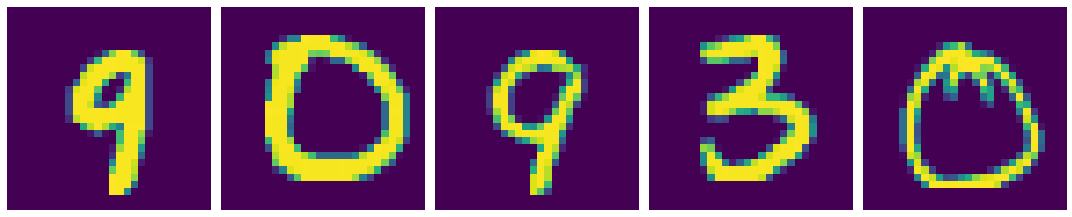

In [5]:
image_generator = ImageDataGenerator(rescale=1./255) 
data_gen = image_generator.flow(x_train, y_train, batch_size=32) 
sample_images, sample_labels = next(data_gen)
plotImages(sample_images[:5])

In [93]:
print(y_test.shape)

(10000,)


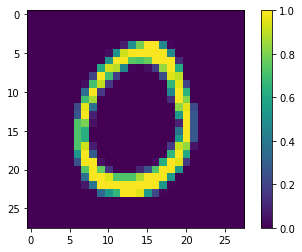

In [8]:
plt.figure()
plt.imshow(sample_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [94]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [95]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [96]:
history = model.fit(x=x_train, y=y_train, epochs=10, verbose=2, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 - 2s - loss: 2.8240 - accuracy: 0.8638 - val_loss: 0.5395 - val_accuracy: 0.8808 - 2s/epoch - 1ms/step
Epoch 2/10
1875/1875 - 2s - loss: 0.3901 - accuracy: 0.9100 - val_loss: 0.3683 - val_accuracy: 0.9165 - 2s/epoch - 1ms/step
Epoch 3/10
1875/1875 - 2s - loss: 0.2833 - accuracy: 0.9290 - val_loss: 0.3230 - val_accuracy: 0.9245 - 2s/epoch - 1ms/step
Epoch 4/10
1875/1875 - 2s - loss: 0.2547 - accuracy: 0.9362 - val_loss: 0.2709 - val_accuracy: 0.9380 - 2s/epoch - 1ms/step
Epoch 5/10
1875/1875 - 2s - loss: 0.2282 - accuracy: 0.9421 - val_loss: 0.2380 - val_accuracy: 0.9444 - 2s/epoch - 1ms/step
Epoch 6/10
1875/1875 - 2s - loss: 0.2138 - accuracy: 0.9476 - val_loss: 0.2646 - val_accuracy: 0.9407 - 2s/epoch - 1ms/step
Epoch 7/10
1875/1875 - 2s - loss: 0.1999 - accuracy: 0.9505 - val_loss: 0.2696 - val_accuracy: 0.9470 - 2s/epoch - 1ms/step
Epoch 8/10
1875/1875 - 2s - loss: 0.1941 - accuracy: 0.9511 - val_loss: 0.2398 - val_accuracy: 0.9481 - 2s/epoch - 1ms/step
Epoch 9/

In [64]:
history.history

{'loss': [0.14171995222568512,
  0.14664176106452942,
  0.13742737472057343,
  0.13164010643959045,
  0.13892878592014313,
  0.1486217975616455,
  0.1399618536233902,
  0.14550787210464478,
  0.1303291618824005,
  0.1263008862733841],
 'accuracy': [0.9696833491325378,
  0.9691833257675171,
  0.9702833294868469,
  0.9707833528518677,
  0.9711999893188477,
  0.9696666598320007,
  0.9711666703224182,
  0.9710166454315186,
  0.9729499816894531,
  0.9729166626930237],
 'val_loss': [0.5415116548538208,
  0.4764206111431122,
  0.472260981798172,
  0.5237268805503845,
  0.621306300163269,
  0.6121989488601685,
  0.5914267301559448,
  0.598502516746521,
  0.5843076109886169,
  0.6219227910041809],
 'val_accuracy': [0.9524999856948853,
  0.949999988079071,
  0.9527000188827515,
  0.9526000022888184,
  0.9474999904632568,
  0.9541000127792358,
  0.9501000046730042,
  0.9510999917984009,
  0.9577000141143799,
  0.9538999795913696]}

In [65]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.6219 - accuracy: 0.9539 - 264ms/epoch - 843us/step


[0.6219227910041809, 0.9538999795913696]

In [89]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation = 'relu'),
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [31]:
model2.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
model2.fit(x=x_train, y=y_train, epochs=10, verbose=2, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 33s 18ms/step - loss: 2.8456 - accuracy: 0.1119
Epoch 2/5
1875/1875 [==============================] - 33s 18ms/step - loss: 2.3011 - accuracy: 0.1121
Epoch 3/5
1875/1875 [==============================] - 33s 17ms/step - loss: 2.3010 - accuracy: 0.1120
Epoch 4/5
1875/1875 [==============================] - 33s 17ms/step - loss: 2.3008 - accuracy: 0.1120
Epoch 5/5
1875/1875 [==============================] - 33s 17ms/step - loss: 2.3005 - accuracy: 0.1118


# Incorporating TensorFlow Private

In [3]:
pip install tensorflow-privacy

Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow_privacy
from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy

In [12]:
epochs = 5
batch_size = 32
l2_norm_clip = 1.5
noise_multiplier = 1.3
num_microbatches = 32
learning_rate = 0.05

if batch_size % num_microbatches != 0:
    raise ValueError('Batch size should be an integer multiple of the number of microbatches')

In [13]:
model = tf.keras.Sequential([ #Using this model as it is quicker to train on.
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])  

In [14]:
optimizer = tensorflow_privacy.DPKerasSGDOptimizer(
    l2_norm_clip=l2_norm_clip,
    noise_multiplier=noise_multiplier,
    num_microbatches=num_microbatches,
    learning_rate=learning_rate)

loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction=tf.losses.Reduction.NONE)

In [15]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

history = model.fit(x_train, y_train,
          epochs=epochs,
          validation_data=(x_test, y_test),
          batch_size=batch_size,
          verbose=1)

Epoch 1/5
1875/1875 [==============================] - 39s 21ms/step - loss: 54.2503 - accuracy: 0.5798 - val_loss: 64.0245 - val_accuracy: 0.6434
Epoch 2/5
1875/1875 [==============================] - 36s 19ms/step - loss: 77.9673 - accuracy: 0.6732 - val_loss: 85.5605 - val_accuracy: 0.6949
Epoch 3/5
1875/1875 [==============================] - 35s 19ms/step - loss: 104.9600 - accuracy: 0.6895 - val_loss: 110.0060 - val_accuracy: 0.7082
Epoch 4/5
1875/1875 [==============================] - 36s 19ms/step - loss: 129.3180 - accuracy: 0.7055 - val_loss: 125.8801 - val_accuracy: 0.7402
Epoch 5/5
1875/1875 [==============================] - 36s 19ms/step - loss: 146.4839 - accuracy: 0.7189 - val_loss: 155.4828 - val_accuracy: 0.7258


In [18]:
compute_dp_sgd_privacy.compute_dp_sgd_privacy(n=x_train.shape[0],
                                              batch_size=600,
                                              noise_multiplier=4,
                                              epochs=400,
                                              delta=1e-5)     #This is the moments accountant

DP-SGD with sampling rate = 1% and noise_multiplier = 4 iterated over 40000 steps satisfies differential privacy with eps = 2.21 and delta = 1e-05.
The optimal RDP order is 9.0.


(2.212905513368701, 9.0)

In [ ]:
history.history

In [ ]:
compute_dp_sgd_privacy.compute_dp_sgd_privacy(n=train_data.shape[0],
                                              batch_size=batch_size,
                                              noise_multiplier=noise_multiplier,
                                              epochs=400,
                                              delta=1e-5)

In [6]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation = 'relu'),
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [7]:
optimizer = tensorflow_privacy.DPKerasSGDOptimizer(
    l2_norm_clip=l2_norm_clip,
    noise_multiplier=noise_multiplier,
    num_microbatches=num_microbatches,
    learning_rate=learning_rate)

loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction=tf.losses.Reduction.NONE)

In [9]:
model2.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

history2 = model2.fit(x_train, y_train,
          epochs=epochs,
          validation_data=(x_test, y_test),
          batch_size=batch_size,
          verbose=1)

Epoch 1/10
  11/1875 [..............................] - ETA: 18:07 - loss: 22.0723 - accuracy: 0.2244

KeyboardInterrupt: 

In [107]:
compute_dp_sgd_privacy.compute_dp_sgd_privacy(n=x_train.shape[0],
                                              batch_size=batch_size,
                                              noise_multiplier=noise_multiplier,
                                              epochs=epochs,
                                              delta=1e-5)

DP-SGD with sampling rate = 0.417% and noise_multiplier = 1.3 iterated over 2400 steps satisfies differential privacy with eps = 0.789 and delta = 1e-05.
The optimal RDP order is 17.0.


(0.7887526073553888, 17.0)

In [108]:
history2.history

{'loss': [0.37263023853302,
  0.46533334255218506,
  0.5629138946533203,
  0.6428921222686768,
  0.7138441801071167,
  0.7793915867805481,
  0.9077559113502502,
  0.9801548719406128,
  1.033383846282959,
  1.0252512693405151],
 'accuracy': [0.9569000005722046,
  0.9524000287055969,
  0.9503499865531921,
  0.9452499747276306,
  0.9432500004768372,
  0.9423499703407288,
  0.9384833574295044,
  0.9358166456222534,
  0.9336333274841309,
  0.932533323764801],
 'val_loss': [0.6581244468688965,
  0.8022482991218567,
  0.8690364956855774,
  0.9882220029830933,
  1.0727137327194214,
  1.0590698719024658,
  1.1159884929656982,
  1.182756781578064,
  1.2651665210723877,
  1.321194052696228],
 'val_accuracy': [0.9460999965667725,
  0.9405999779701233,
  0.9404000043869019,
  0.9305999875068665,
  0.934499979019165,
  0.9354000091552734,
  0.9326000213623047,
  0.932699978351593,
  0.9309999942779541,
  0.927299976348877]}